# Sentiment Anaysis using Naive Bayes 

## 1.  Problem definition
### I am going to take the following steps to carry out a sentiment analysis by using the classification method into two classes of positive and negative upon the date set "Movie reviews":
1.  Collection of reviews with labels
  *  a.	Packages - In particular we will use the text feature such as tf-idf and 
the probabilistic inference models such as Naïve Bayes from the package.  The package that can be used sklearn.  Nlt(Natural Language Tool kit) – This is one of the best documented python packages for language processing.  
  *  b.	Install packages – Packages mentioned above.
  *  c.	Nltk.download -  download data
  *  d.	Get the positive and negative reviews -  1 is assign to positive and 0 as negative.
  *  e.	Load data – 
  *  f.	Generate labels – “0” for positive and “1” represent negative.
2.  Split data into train and test set
3.  Extract word count features – Calculate the tf-idf features form training set and check dataset size.  
4.  Build the Naive Bayes classifier from training set – Using Multinomial Naïve Bayes (discrete data) to train the model.
5.  Apply Classifier on test data set.
6.  Evaluate the performance -  Accuracy, precision, recall, f1-score.


## 2.  Solution implementation


###  Importing the required packages.  

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

### Another python pack we need to import is sklearn.naive_bayes to process text features such as tf-idf.  Since the data is binary we can use MultinomilaNB package.  
  

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
tfidf = TfidfVectorizer(use_idf=True)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)

# Train the naive Bayes model for prediction
classifier = MultinomialNB().fit(tfidf_data, Y_train)

(1600, 36387)


In [ ]:
# Performance on the testing set
testing_tfidf = tfidf.transform(X_test)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.82      0.90      0.86       186
         neg       0.90      0.83      0.87       214

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



In [ ]:
print(X_train[0])
print(testing_tfidf[0])

when i initially set out to review this film , my tag line was going to be " you too can believe whales can fly " . 
then it was going to be " you too can believe pastel triangles can fly " . 
then , it was going to be " you too can believe wood sprites can fly " . 
finally , i just gave up trying to come up with a tag line and decided to say . . . 
there's a lot of flying going on in this film ! 
as our first host steve martin tells us , the original concept behind fantasia was to bring it out every year with some old segments retained and some new segments added in . 
well apparently that plan fell by the wayside for a while , because approximately sixty years have passed since the original classic was released . 
part of this might have something to do with the cold reception the film got when it was first released in 1940 ( grossing somewhere close to $110 , 000 in its original month of release ) . 
subsequent re-releases of the film have elevated the popularity of the film to the 

(-1.0, 1.0)

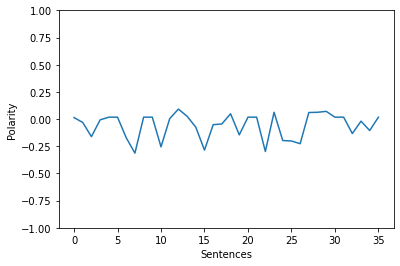

In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
import matplotlib.pyplot as plt

sentences = X_test[0].split('.')

testing_tfidf = tfidf.transform(sentences)
predictions = classifier.predict_proba(testing_tfidf)
polarity = [x[0] - x[1] for x in predictions]
# polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]

plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.plot(polarity)
plt.ylim(-1, 1)

##3.  Model Evaluation
In ordert o evalute the model performance we must interpret the classification report labeled "Performance on testing set".  Looking at the main classification metrics we can say:
  *  **Precision** - This answers the qurestion "what percent of the predictions were correct?".  From a test sample of 215 we had a precision figure of 0.91.  If the model is perfect the highest score it can achieve is 1.  Hence our model prediction of "positive sentiments labels '0'" was good.  For the "negative sentiment" out of a sample of only 185 the precision score was 0.65.  I would think that there is room for improvement. Precision = TP/(TP + FP) 
  *  **Recall** - This tells us what percent of the actual case did I catch? Recall is calculated = TP/(TP+FN).  For the positive sentiment precision score was 0.57.  This mean the false negative had a high value.  It had a score of 0.94 for "negative sentiment."  
  *  **F1 Score**- This gives us what percent of positie prediction was correct.  It is calculated F1 Score = 2*(Recall * Precision) / (Recall + Precision). The score for positve and negative sentimentas are 0.70 and 0.77 respectively.  
  *  **Accuracy** - How any predictions was corect(positive and negative).  This figure was 0.70.  
  *  **Macro Avg** - This is the average score between Precision, F1 score, and recal.  It does not take class imbalace into account as seen above.  For Positive sentiment we have 215 and for negative 185 samples. Hence, this dataset is balanced.
  *  **weighted Avg** - This simply gives us the weighted average between F1 score, Recall and precision.  This metrics favours the majority class. Hence we see above the weighted average and Macro average scores are not the same indicating there is an inbalance between the classes.  This mertics tends to favour the larger sample class.  

Conclusion
It is my view the model can be used for movie reviews.  We had a high prediction rate of 0.9 and a low recall.  Hence the model provides both useful and relevant data.  The graph shows that with increase sentence the model performance was consistent and reliable.    



